## Hypothesis: Representation of female in workforce is correlated to that of higher educaation

### 1. Prepare the workstation

In [1]:
#import all the necessary packages for simple linear regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# import the data sets
df = pd.read_csv('Workforce and number of students 2014-2020.csv')

df

,Year,Workforce female,Workforce male,Workforce total,Student female,Student male,Student other,Student total,Postgrad female,Postgrad male,Postgrad other,Postgrad total,Undergrad female,Undergrad male,Undergrad other,Undergrad tota
0,2014/15,447300,1927400,2374500,224805,377180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015/16,435600,1982100,2417900,232880,381690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016/17,472300,2037500,2510000,244465,387030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/18,503900,2050700,2554600,255925,390165,400.0,646490.0,56070.0,73240.0,155.0,129460.0,199845.0,316930.0,250.0,517025.0
4,2018/19,501300,2165600,2666900,267615,394145,660.0,662420.0,59705.0,75840.0,235.0,135775.0,207915.0,318295.0,430.0,526640.0
5,2019/20,541600,2246500,2788100,165250,376140,630.0,542025.0,39910.0,76935.0,215.0,117055.0,125350.0,299210.0,420.0,424975.0


In [3]:
# drop all the rows with missing values
df_1 = df.dropna(axis=1)

# check the result
df_1

,Year,Workforce female,Workforce male,Workforce total,Student female,Student male
0,2014/15,447300,1927400,2374500,224805,377180
1,2015/16,435600,1982100,2417900,232880,381690
2,2016/17,472300,2037500,2510000,244465,387030
3,2017/18,503900,2050700,2554600,255925,390165
4,2018/19,501300,2165600,2666900,267615,394145
5,2019/20,541600,2246500,2788100,165250,376140


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              6 non-null      object
 1   Workforce female  6 non-null      int64 
 2   Workforce male    6 non-null      int64 
 3   Workforce total   6 non-null      int64 
 4   Student female    6 non-null      int64 
 5   Student male      6 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 416.0+ bytes


In [5]:
df_1.describe()

,Workforce female,Workforce male,Workforce total,Student female,Student male
count,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000
mean,483666.666667,2.068300e+06,2.552000e+06,231823.333333,384391.666667
std,39594.780801,1.181221e+05,1.550516e+05,36066.959210,7250.059770
min,435600.000000,1.927400e+06,2.374500e+06,165250.000000,376140.000000
25%,453550.000000,1.995950e+06,2.440925e+06,226823.750000,378307.500000
50%,486800.000000,2.044100e+06,2.532300e+06,238672.500000,384360.000000
75%,503250.000000,2.136875e+06,2.638825e+06,253060.000000,389381.250000
max,541600.000000,2.246500e+06,2.788100e+06,267615.000000,394145.000000


### 2. Plot the correlation

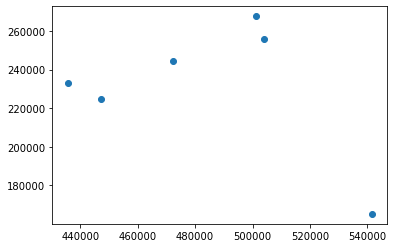

In [6]:
# define the variables
y = df_1['Student female']
x = df_1['Workforce female']

# create a basic scatterplot
plt.plot(x, y, 'o')  

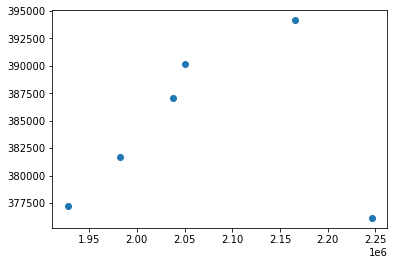

In [7]:
# define the variables
y = df_1['Student male']
x = df_1['Workforce male']

# create a basic scatterplot
plt.plot(x, y, 'o')

#### The change in subject codes in academic year 2019/20. There would be bias in time series analysis.
**Solution: exclude data from academic year 2019/20.**

In [8]:
# shortlist the rows to exclude 2019/20
df_2 = df_1.iloc[0:5,  : ]

# check the result
df_2

,Year,Workforce female,Workforce male,Workforce total,Student female,Student male
0,2014/15,447300,1927400,2374500,224805,377180
1,2015/16,435600,1982100,2417900,232880,381690
2,2016/17,472300,2037500,2510000,244465,387030
3,2017/18,503900,2050700,2554600,255925,390165
4,2018/19,501300,2165600,2666900,267615,394145


### 3. The simple linear regression model

**3.1 Females**

In [37]:
# choose the variables
x = df_2["Workforce female"].values.reshape(-1, 1) 
y = df_2["Student female"].values

In [38]:
# run linear regression
lr = LinearRegression()

In [39]:
# fit the model on the training data
lr.fit(x, y)

LinearRegression()

In [40]:
# predict is used for predicting on the x_test
y_pred = lr.predict(x)

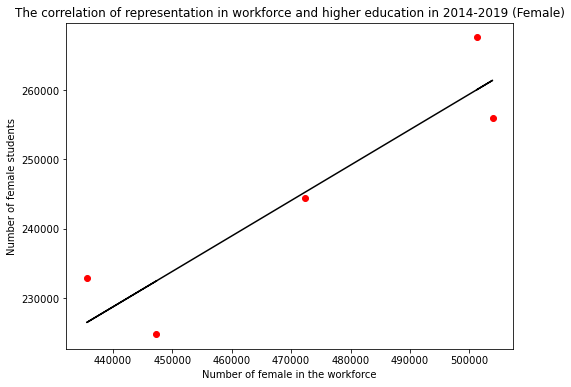

In [41]:
# visualization of the regression model

# change the size of the plot
plt.figure(figsize=(8,6))

# scatter plot with the best-fit line
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "black")

# assign title and labels of axes
plt.title("The correlation of representation in workforce and higher education in 2014-2019 (Female)")
plt.xlabel("Number of female in the workforce")
plt.ylabel("Number of female students")

# prevent scientific notation of the axes
plt.ticklabel_format(style='plain')

plt.show()

In [42]:
# print R-squared value of the model
print(lr.score(x, y)) 

0.8422176664828146


In [43]:
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  3487.875088423316
Coefficient value:  [0.51188384]


**3.2 Males**

In [29]:
# choose your variables
x_m = df_2["Workforce male"].values.reshape(-1, 1) 
y_m = df_2["Student male"].values

In [30]:
# run linear regression
lr = LinearRegression()

In [31]:
# fit the model on the training data
lr.fit(x_m, y_m)

LinearRegression()

In [32]:
# predict is used for predicting on the x_test
y_pred = lr.predict(x_m)

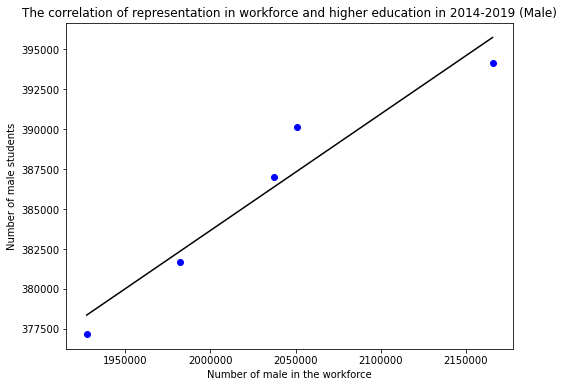

In [33]:
# visualization of the regression model

# change the size of the plot
plt.figure(figsize=(8,6))

# scatter plot with the best-fit line
plt.scatter(x_m, y_m, color = "blue")
plt.plot(x_m, lr.predict(x_m), color = "black")

# assign title and labels of axes
plt.title("The correlation of representation in workforce and higher education in 2014-2019 (Male)")
plt.xlabel("Number of male in the workforce")
plt.ylabel("Number of male students")

# prevent scientific notation of the axis
plt.ticklabel_format(style='plain')

plt.show()

In [34]:
# print R-squared value of the model
print(lr.score(x_m, y_m)) 

0.9300597404029031


In [35]:
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  237773.47077404897
Coefficient value:  [0.0729431]
